## Import dữ liệu

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

df = pd.read_csv('Mall_Customers.csv')
# Transform Gender to 0's and 1's
df['Gender'] = df['Gender'].map({'Male': 1, "Female": 0})
df.info()
# Data for cluster
X = df.iloc[:, -4:]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Gender                  200 non-null    int64
 2   Age                     200 non-null    int64
 3   Annual Income (k$)      200 non-null    int64
 4   Spending Score (1-100)  200 non-null    int64
dtypes: int64(5)
memory usage: 7.9 KB


## Xây dựng mô hình K-Means

In [9]:
# We will create K-Means Models `iteratively between k values of 3 to 10`and at each step, capture the `Silhoutte Score` and `Inertia (Sum of Squared Distances)`

km_inertias, km_scores = [], []
for k in range(3, 10):
 km = KMeans(n_clusters=k).fit(X)
 km_inertias.append(km.inertia_)
 km_scores.append(silhouette_score(X, km.labels_))
 print(f"Processing K-Means with k = {k}, Intertia = {km.inertia_}, Silhoutte Score = {silhouette_score(X, km.labels_)}")
km_inertias


Processing K-Means with k = 3, Intertia = 158794.2215016297, Silhoutte Score = 0.33545193002465656
Processing K-Means with k = 4, Intertia = 110045.92297541516, Silhoutte Score = 0.39219951374758283
Processing K-Means with k = 5, Intertia = 129939.2861342162, Silhoutte Score = 0.2969469435850927
Processing K-Means with k = 6, Intertia = 76281.88884491395, Silhoutte Score = 0.3563024049427127
Processing K-Means with k = 7, Intertia = 54798.124821012316, Silhoutte Score = 0.3977660392757776
Processing K-Means with k = 8, Intertia = 44391.82080487078, Silhoutte Score = 0.4259878450877001
Processing K-Means with k = 9, Intertia = 41802.817910379075, Silhoutte Score = 0.414190772125081


[158794.2215016297,
 110045.92297541516,
 129939.2861342162,
 76281.88884491395,
 54798.124821012316,
 44391.82080487078,
 41802.817910379075]

## Elbow

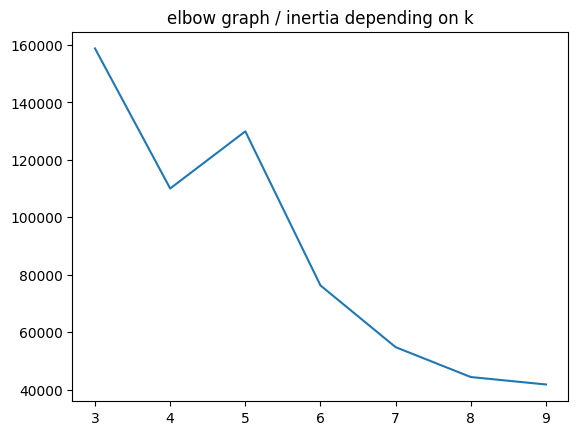

In [10]:
# sns.lineplot(range(3, 10), km_inertias) PHUOCNT
sns.lineplot(x=range(3, 10), y=km_inertias)
plt.title('elbow graph / inertia depending on k')
plt.show()